# Data Visualization in python
## Area Plots, Histograms, and Bar Plots

In [1]:
#for fetch excel data
# !pip install openpyxl==3.0.9

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd

In [3]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

import requests

response = requests.get(url= URL)
content = response.content

# or from local file
# file_path = r"C:\Users\kshar\myfiles\Datasets\Canada.xlsx"

In [4]:
df_canadian_immigration = pd.read_excel(content,sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter= 2)

In [5]:
df_canadian_immigration.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_canadian_immigration.shape

(195, 43)

#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [7]:
df_canadian_immigration.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_canadian_immigration.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### 2. Rename some of the columns so that make sense

In [8]:
df_canadian_immigration.rename(columns= {"OdName": "Country","AreaName":"Continent","RegName":"Region"},inplace= True)

In [9]:
df_canadian_immigration.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### 3. For consistency, ensure that all column labels of type string.

In [10]:
list1 = [isinstance(column,str) for column in df_canadian_immigration.columns]
all(list1)

False

* false that means there is some non string type so change them all to string type 

In [11]:
df_canadian_immigration.columns = list(map(str,df_canadian_immigration.columns))
all(isinstance(column,str) for column in df_canadian_immigration.columns)

True

In [12]:
df_canadian_immigration.set_index("Country",inplace= True)
df_canadian_immigration.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


#### 5.Add Total column

In [13]:
df_canadian_immigration["Total"] = df_canadian_immigration.sum(axis= 1)
df_canadian_immigration.head()

C:\Users\kshar\AppData\Local\Temp\ipykernel_18944\2229288495.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canadian_immigration["Total"] = df_canadian_immigration.sum(axis= 1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [14]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib<a id="4"></a>

In [15]:
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
# plt.hist("Total",years,)
# plt.show

## Area Plot :
 * Stacked Line Plot or Area plot.

In [17]:
df_canadian_immigration.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_canadian_immigration.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

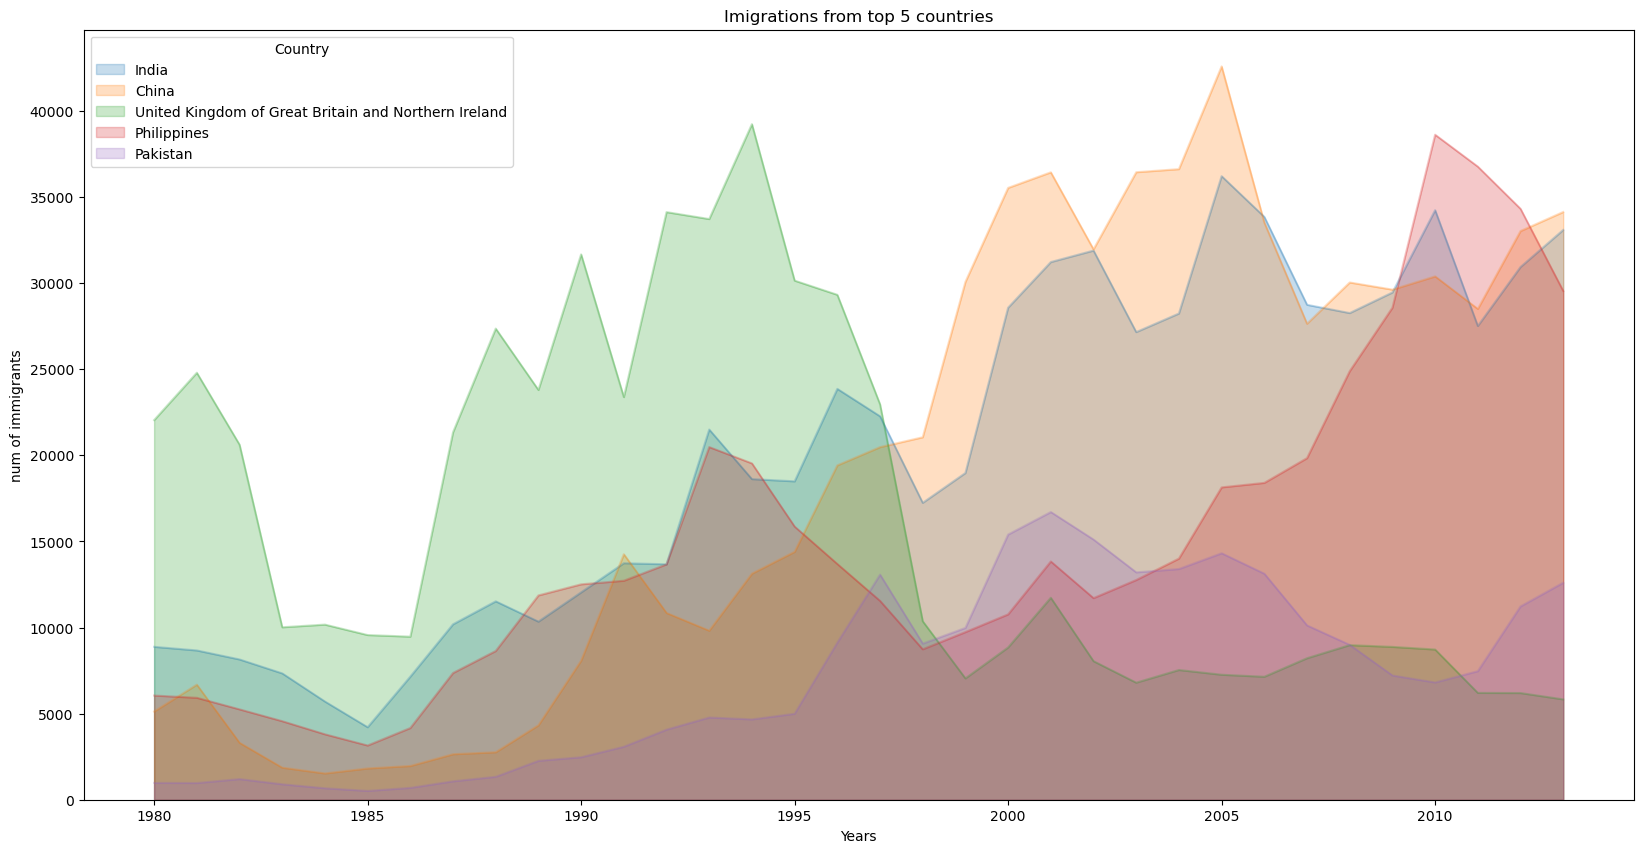

In [18]:
df_top5.plot(kind = "area",
            figsize = (20,10),
            stacked = False,
            alpha=0.25,  # 0 - 1, default value alpha = 0.5)
            )
plt.title("Imigrations from top 5 countries")
plt.xlabel("Years")
plt.ylabel("num of immigrants")
plt.show()

**Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)**

Text(0.5, 0, 'Years')

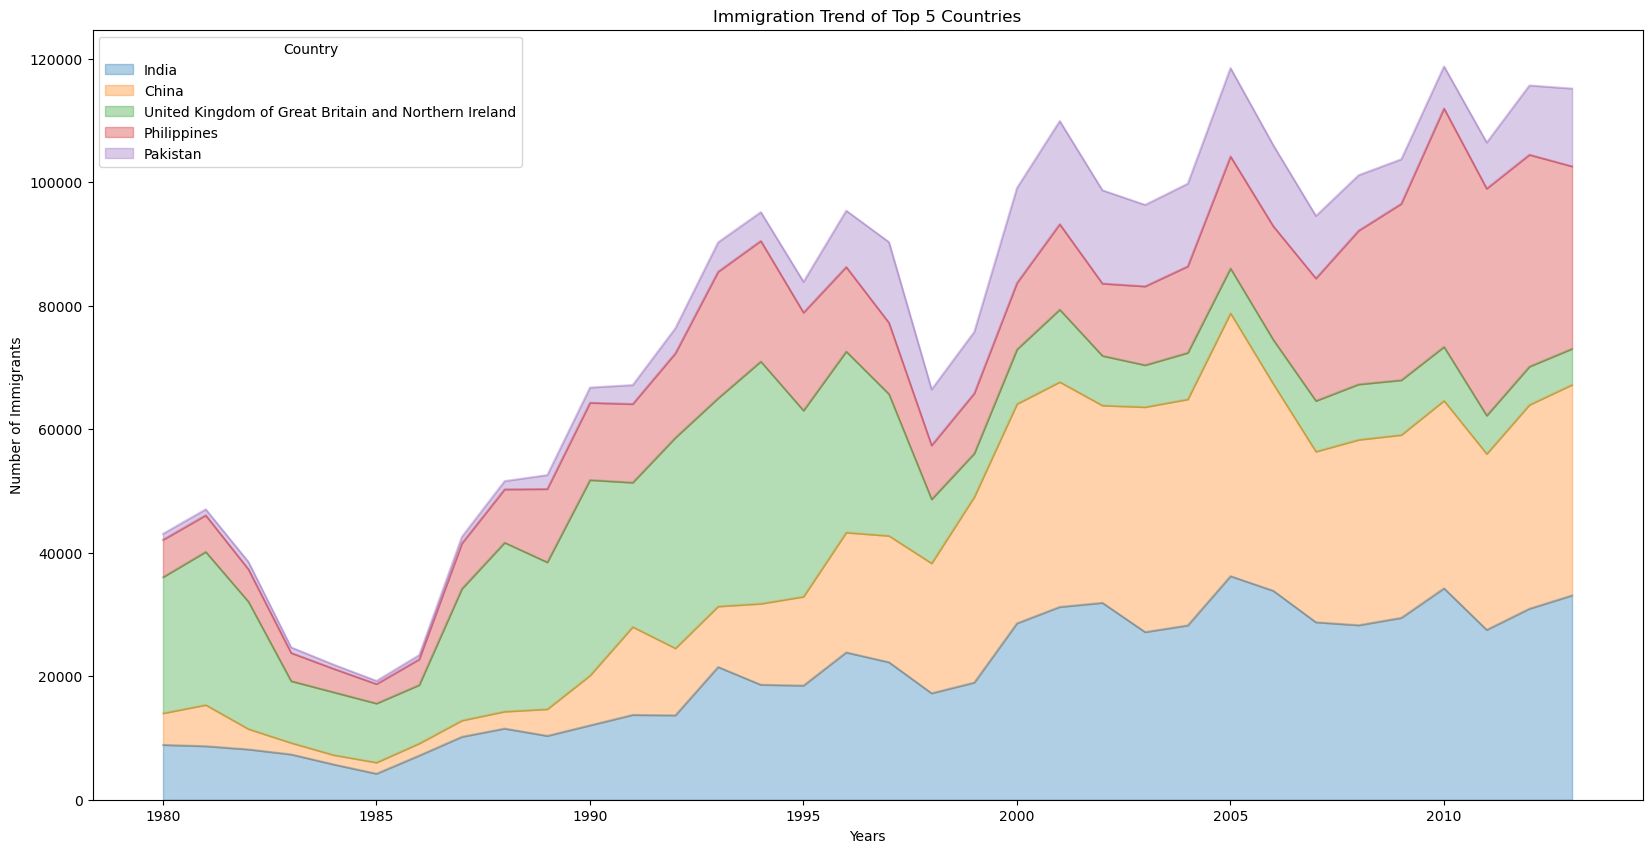

In [19]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [20]:
# for least 5 countries
df_least5 = df_canadian_immigration.tail()
df_least5 = df_least5[years].transpose()
df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


Text(0.5, 0, 'Years')

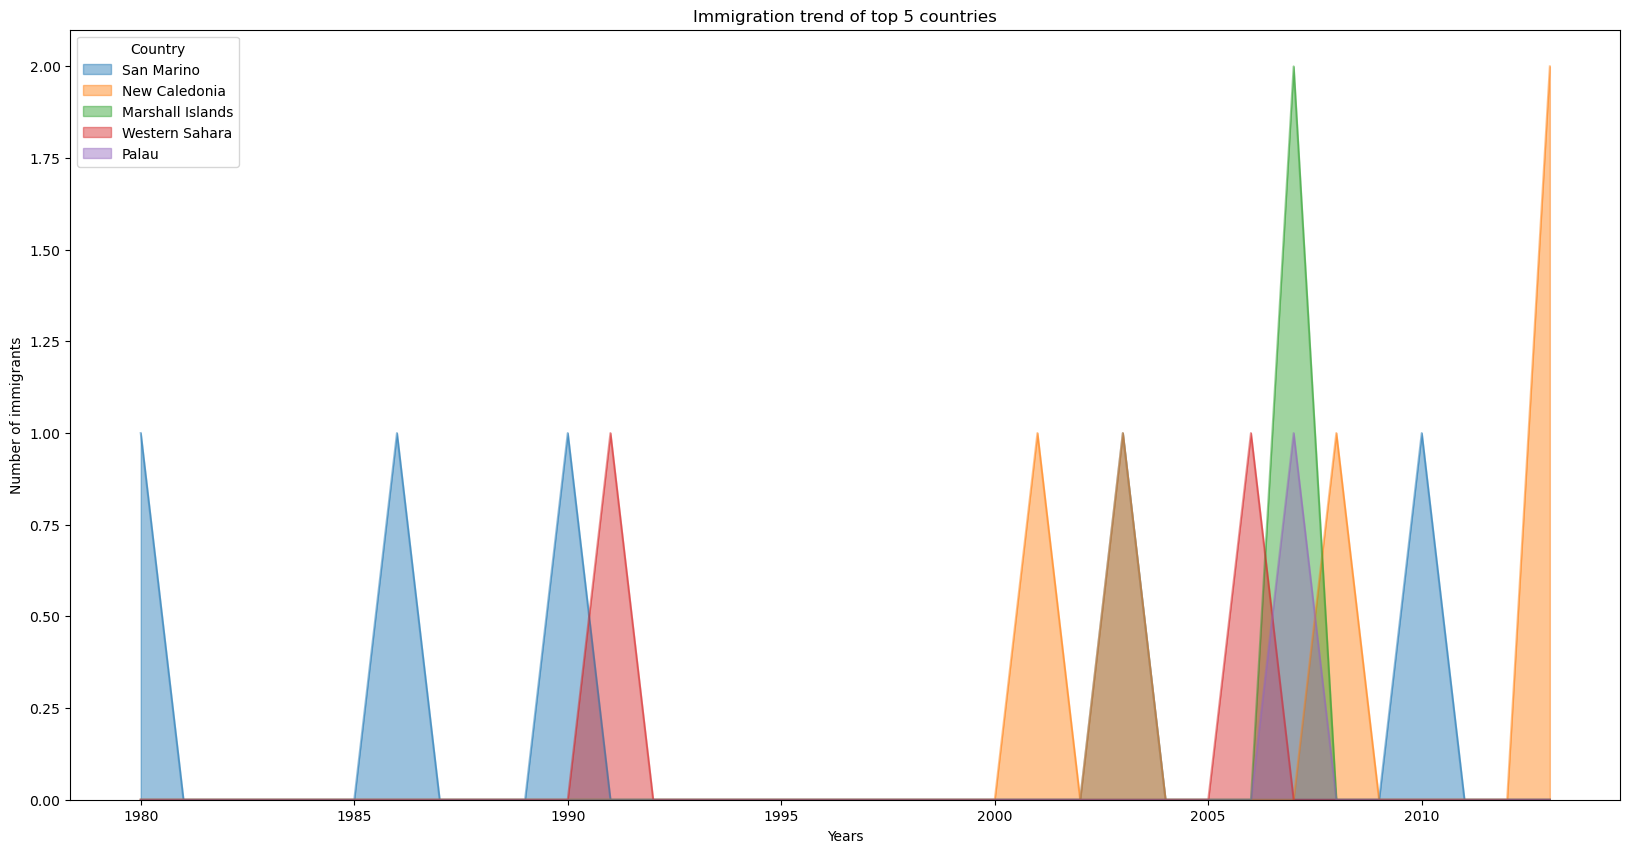

In [21]:
df_least5.plot(kind = "area",figsize = (20,10),stacked=False,alpha = 0.45)
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# Histogram

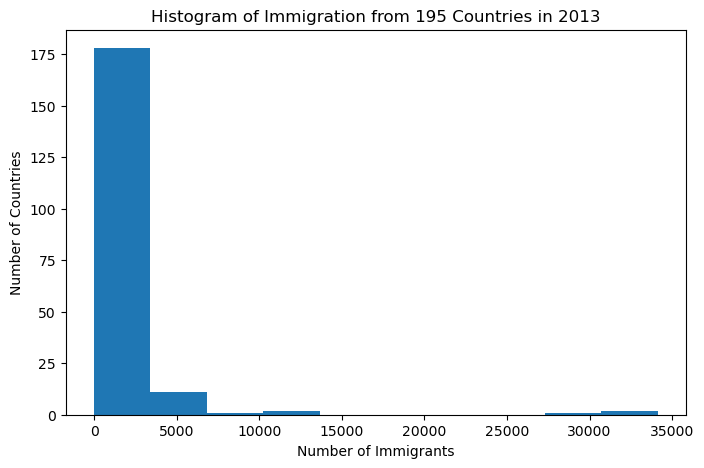

In [22]:
df_canadian_immigration['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

<AxesSubplot: ylabel='Frequency'>

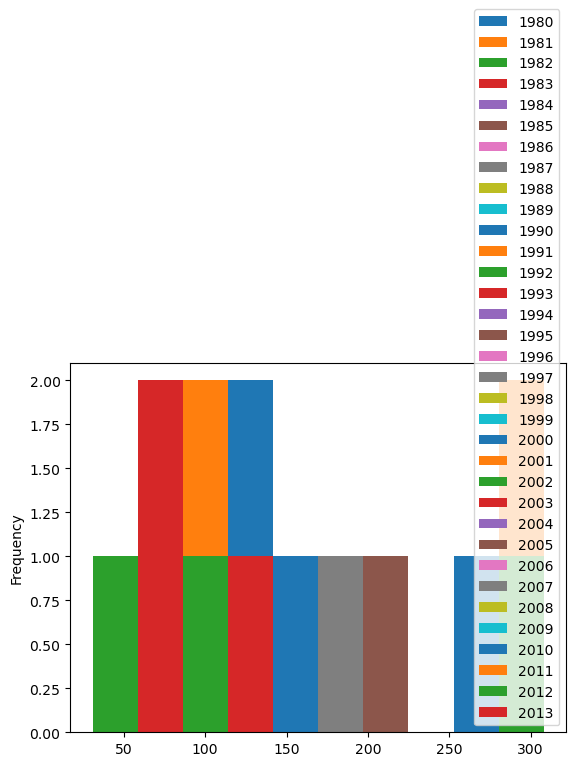

In [23]:
# generate histogram
df_canadian_immigration.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

 That does not look right.
 Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [24]:
# transpose dataframe
df_t = df_canadian_immigration.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


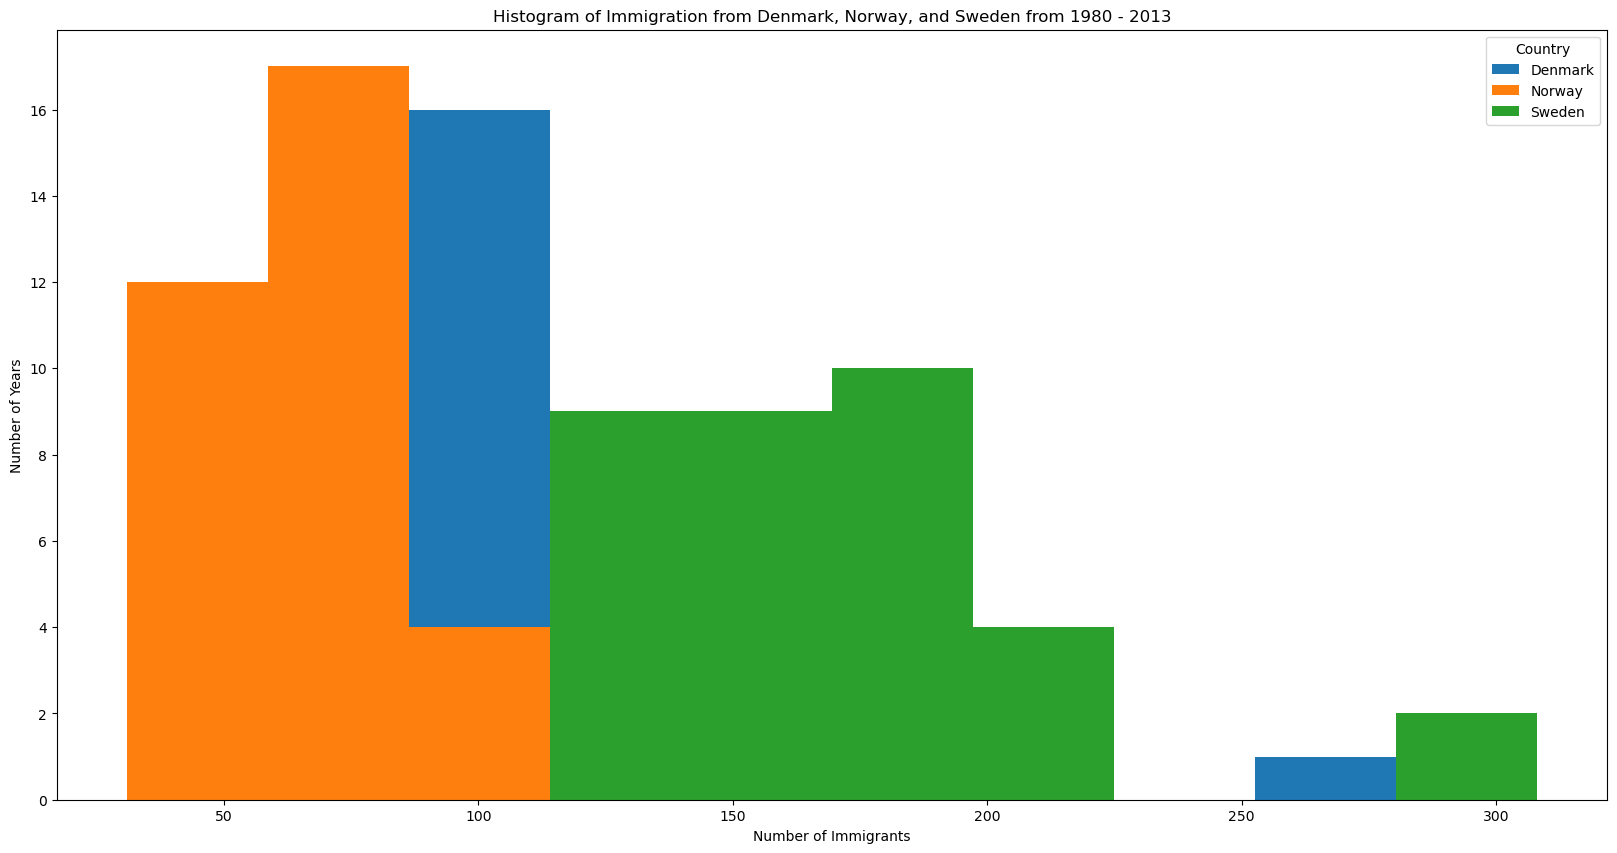

In [25]:
df_t.plot(kind = "hist",figsize = (20,10))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.

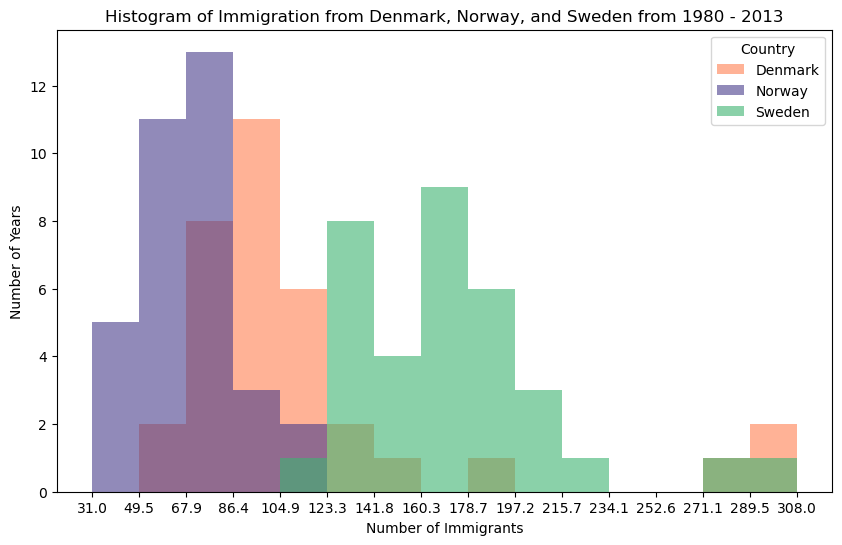

In [26]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Barplot :
A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.
#### parameter in plot():
*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

In [29]:
df_iceland = df_canadian_immigration.loc["Iceland",years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

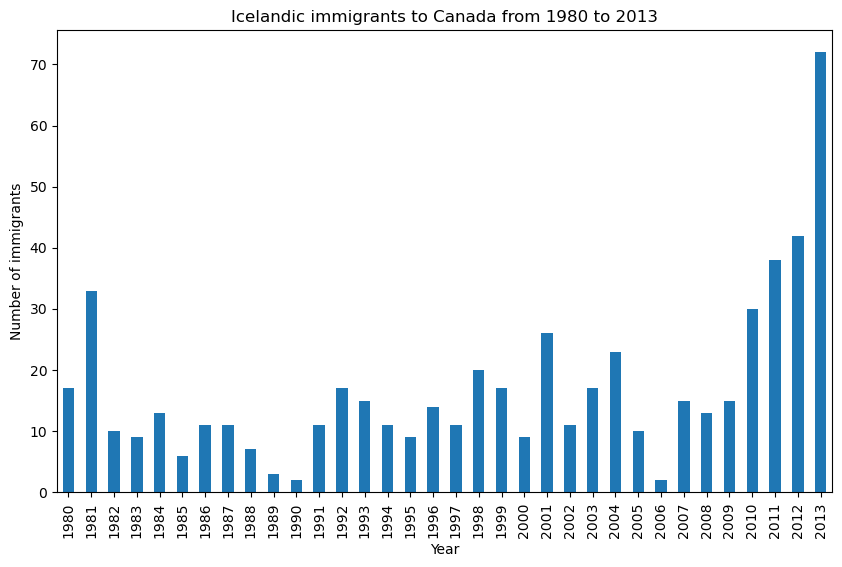

In [30]:
df_iceland.plot(kind = "bar", figsize = (10,6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

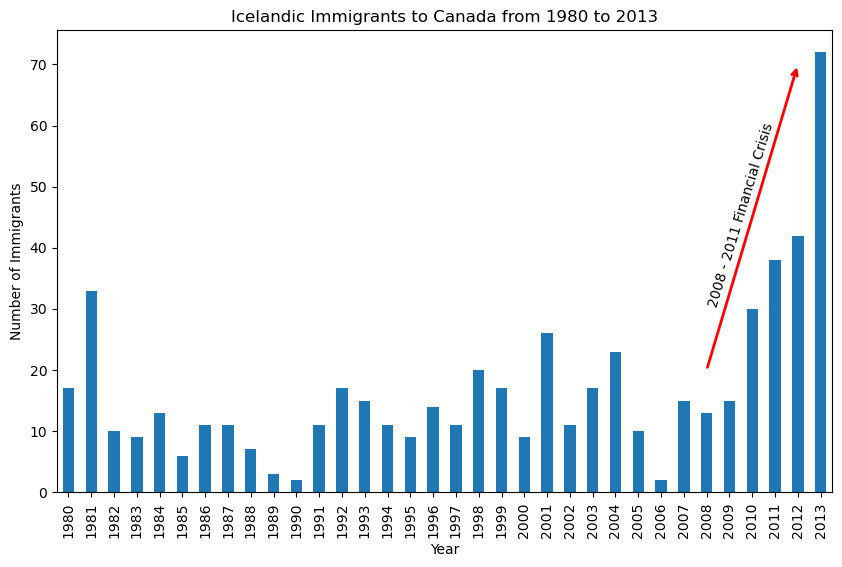

In [45]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
             )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=73,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )
plt.show()

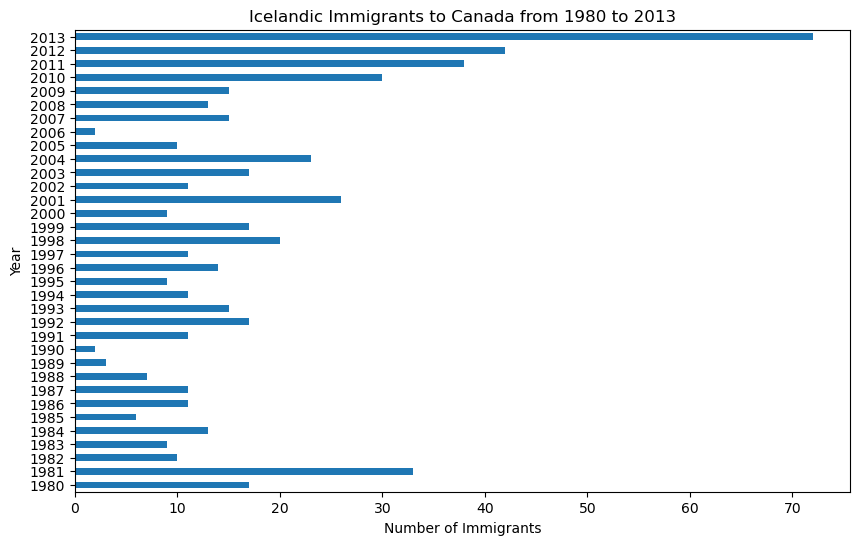

In [50]:
#similarly horizontal barplot
df_iceland.plot(kind = "barh",figsize = (10,6),rot = 0)

plt.ylabel('Year')
plt.xlabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.show()

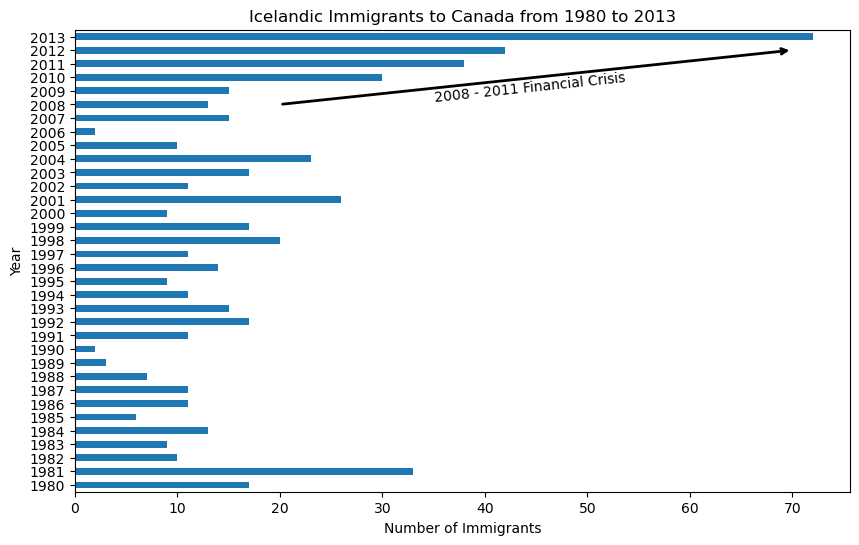

In [84]:
df_iceland.plot(kind = "barh",figsize = (10,6),rot = 0)

plt.ylabel('Year')
plt.xlabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate("",
             xy = (70,32),
             xytext = (20,28), # 2008 - 2013
             xycoords = "data",
             arrowprops = dict(arrowstyle = "->",connectionstyle = "arc3",lw = 2)
                )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(35,28),  # start the text at at point (year 2008 , pop 30)
             rotation=6,  # based on trial and error to match the arrow
             va='bottom')  # want the text to be vertically 'bottom' aligned
               # want the text to be horizontally 'left' algned.

plt.show()


### **Question** : create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [64]:
df_canadian_immigration.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canadian_immigration['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

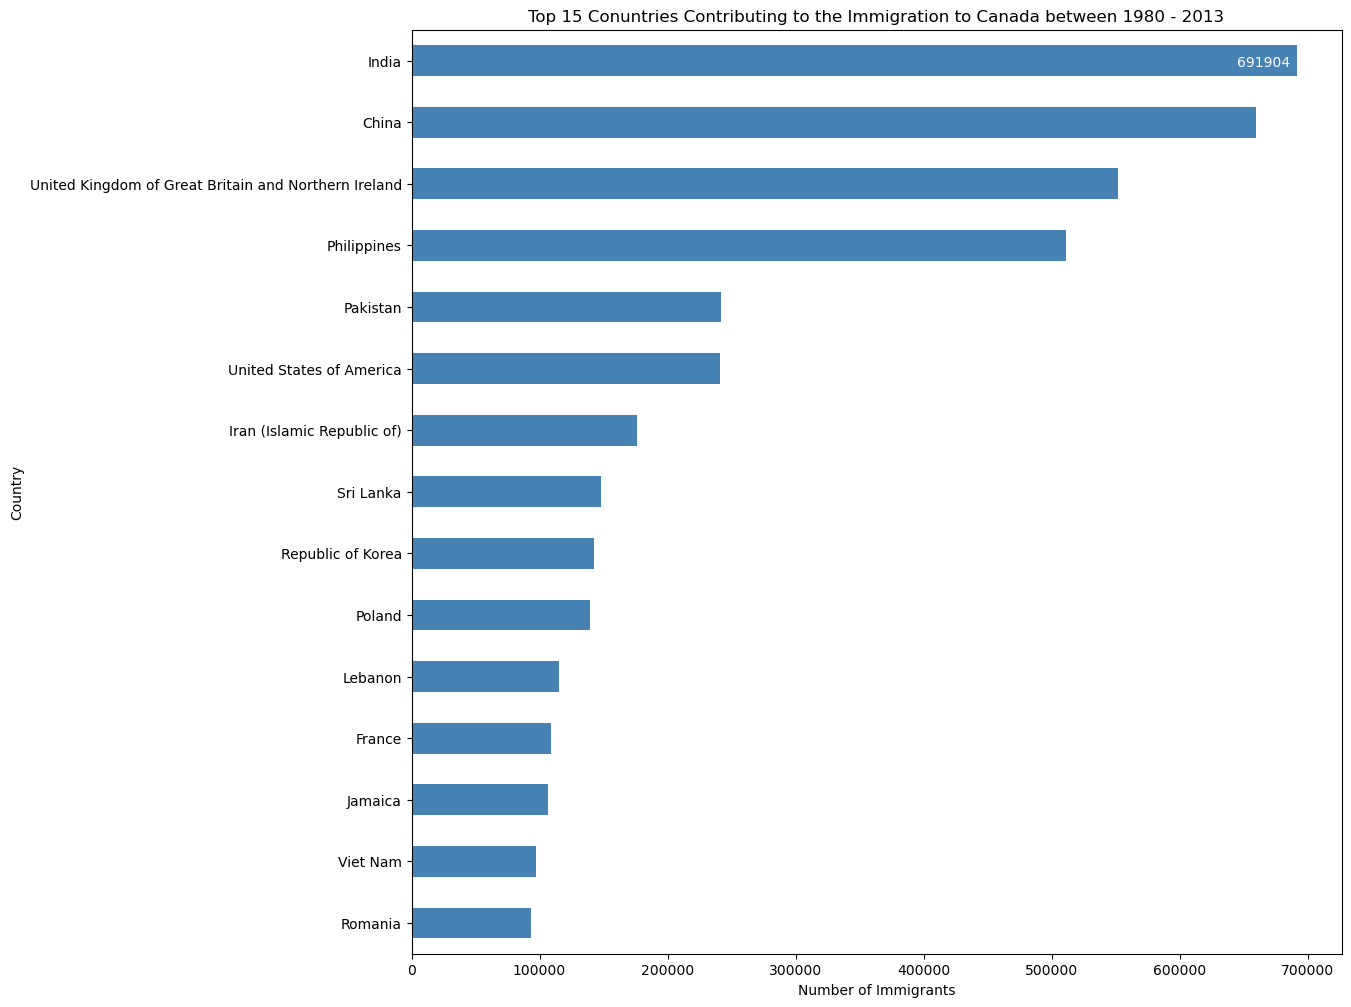

In [70]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
        label = int(value) # format int with commas
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()